In [13]:
import numpy as np
import json
import random
import os
import math
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 1337
random.seed(seed)
np.random.seed(seed)

In [3]:
import eukg.data.data_util as data_util


In [4]:
data_dir = '/users/max/data/artifacts/umls-embeddings'

In [52]:
cui2id, data, train_idx, val_idx = data_util.load_metathesaurus_data(data_dir, val_proportion=0.1)
test_data = data_util.load_metathesaurus_test_data(data_dir)

In [6]:
t_data = data_util.load_metathesaurus_token_data(data_dir)

In [8]:
train_subj = data['subj'][train_idx]
train_rel = data['rel'][train_idx]
train_obj = data['obj'][train_idx]

In [14]:
subj_l = Counter()
obj_l = Counter()
for subj, rel, obj in tqdm(zip(train_subj, train_rel, train_obj), total=len(train_subj)):
  subj_l[(subj, rel)] += 1
  obj_l[(obj, rel)] += 1

100%|██████████| 7777930/7777930 [00:17<00:00, 446225.25it/s]


In [47]:
def hist(counter):
  values = np.array([int(x) for x in counter.values()])
  min_count = np.min(values)
  max_count = np.max(values)
  avg_count = np.mean(values)
  percentile = np.percentile(values, 99)
  print(f'min={min_count}, max={max_count}, mean={avg_count:.2f}, 99th-percentile={percentile:.2f}')
  plt.hist(values[values <= percentile])
  plt.show()

min=1, max=73226, mean=4.15, 99th-percentile=38.00


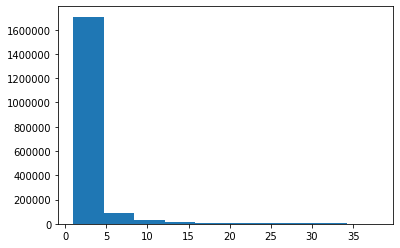

In [48]:
hist(subj_l)

min=1, max=14946, mean=1.94, 99th-percentile=12.00


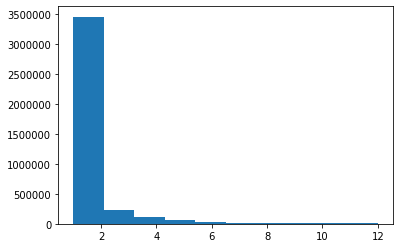

In [49]:
hist(obj_l)

In [53]:
total_objs = np.unique(np.concatenate([data['obj'], test_data['obj']]))
total_subj = np.unique(np.concatenate([data['subj'], test_data['subj']]))
total_rels = np.unique(np.concatenate([data['rel'], test_data['rel']]))
obj_count = len(total_objs)
subj_count = len(total_subj)
rel_count = len(total_rels)

In [59]:
id2cui = {i:c for c, i in cui2id.items()}

In [54]:
print(f'subjs={subj_count}, rels={rel_count}, objs={obj_count}')

subjs=1019792, rels=342, objs=1473733


In [60]:
for (subj, rel), obj_c in subj_l.most_common(10):
  print(f'{id2cui[subj]}, {id2cui[rel]}: {obj_c}')

C1442880, has_time_aspect: 73226
C1442116, has_scale: 36922
C0043047, has_inactive_ingredient: 21133
C1442114, has_scale: 20822
C0229671, has_system: 19082
C0243095, has_property: 18362
C3899741, concept_in_subset: 18015
C1880104, concept_in_subset: 17523
C0993159, has_dose_form: 17250
C1879948, concept_in_subset: 15412


In [62]:
for (obj, rel), subj_c in obj_l.most_common(10):
  print(f'{id2cui[obj]}, {id2cui[rel]}: {subj_c}')

C0016658, classifies: 14946
C0810139, classifies: 8143
C1444713, subject_relationship_context_of: 6398
C1542178, classifies: 6171
C0178316, classifies: 6036
C0810203, classifies: 3823
C0042776, component_of: 3382
C0020852, component_of: 3331
C0810204, classifies: 3267
C0332798, classifies: 3232


In [66]:
max_rel_count = 4.15
num_samples = 100
b_size = 100

p_correct = max_rel_count / obj_count

p = p_correct * num_samples
print(f'{p*100:.6f}')


0.028160


In [67]:
concept_count = len(
      np.unique(
        np.concatenate(
          [data['obj'], test_data['obj'], data['subj'], test_data['subj']]
        )
      )
    )

In [68]:
print(concept_count)
print(max(np.unique(
        np.concatenate(
          [data['obj'], test_data['obj'], data['subj'], test_data['subj']]
        )
      )))

1563246
1563587
